<a href="https://colab.research.google.com/github/pilafniev/Image_recognition_CNN/blob/master/Image_recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

CNN to categorize a set of 10,000 test images into 10 categories.

<br>**Features**
* I was able to achieve an accuracy of 81% at a reasonable runtime. <br>
* I looked into and incorporated model checkpoint to only save epocs that improve as well as dropout. 
* I further tweaked the architecture by decreasing the amount of convolutional filters per layer and concatenated pairs of 2 layers before calling max pooling. 
* I also played around with different droput values and chose those which gave me best performance.

<br>**References**<br>
* Professor Yuan-Fang Wang class notes.
* Margaret Maynard-Reid tutorial on CNN with keras.


## Download data


In [46]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


## Visualize the data

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
50000 train set
10000 test set
<class 'numpy.uint8'>
y = 1 auto


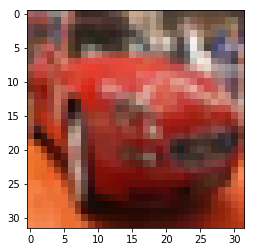

In [47]:
# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
cifar10_labels = ["airplane",  # index 0
                        "auto",      # index 1
                        "bird",     # index 2 
                        "cat",        # index 3 
                        "deer",         # index 4
                        "dog",       # index 5
                        "frog",        # index 6 
                        "horse",      # index 7 
                        "ship",          # index 8 
                        "truck"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
label_index = label_index[0]
print(type(label_index))
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(cifar10_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [49]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 50000
Number of test data - 10000


## Debug Step

In [50]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 10)
50000 train set
10000 validation set
10000 test set


## Create network topology

In [51]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# model.add(tf.keras.layers.Dropout(0.6))

model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.6))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 128)         0         
__________

## Compile the model


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49664/50000 [============================>.] - ETA: 0s - loss: 1.5554 - acc: 0.4272
Epoch 00001: val_loss improved from inf to 1.16087, saving model to model.weights.best.hdf5
50000/50000 [==============================] - 9s 181us/sample - loss: 1.5532 - acc: 0.4280 - val_loss: 1.1609 - val_acc: 0.5798
Epoch 2/20
49728/50000 [============================>.] - ETA: 0s - loss: 1.0867 - acc: 0.6139
Epoch 00002: val_loss improved from 1.16087 to 0.91198, saving model to model.weights.best.hdf5
50000/50000 [==============================] - 8s 166us/sample - loss: 1.0857 - acc: 0.6143 - val_loss: 0.9120 - val_acc: 0.6760
Epoch 3/20
49920/50000 [============================>.] - ETA: 0s - loss: 0.8888 - acc: 0.6869
Epoch 00003: val_loss improved from 0.91198 to 0.76041, saving model to model.weights.best.hdf5
50000/50000 [==============================] - 8s 166us/sample - loss: 0.8889 - acc: 0.6869 - val_loss: 0.7604 - val_acc: 0

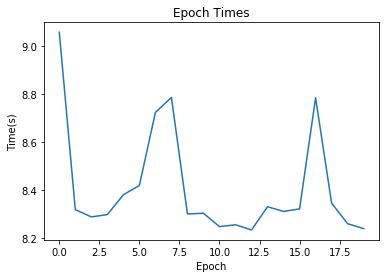

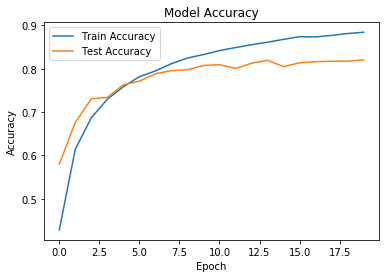

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
        
time_callback = TimeHistory()

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=20,
         validation_data=(x_test, y_test),
         callbacks=[checkpointer, time_callback])
model.save('model.cifar10.h5')

#Plot Epoch Time
times = time_callback.times
plt.plot(time_callback.times)
plt.title('Epoch Times')
plt.ylabel('Time(s)')
plt.xlabel('Epoch')
plt.show()
# Plot Accuracy Data
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

## Load Model

In [0]:
# Load entire model 
# model = load_model('model.cifar10.h5')
# Not necessary for demo.

## Test Accuracy

In [55]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8207


## Visualize prediction
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

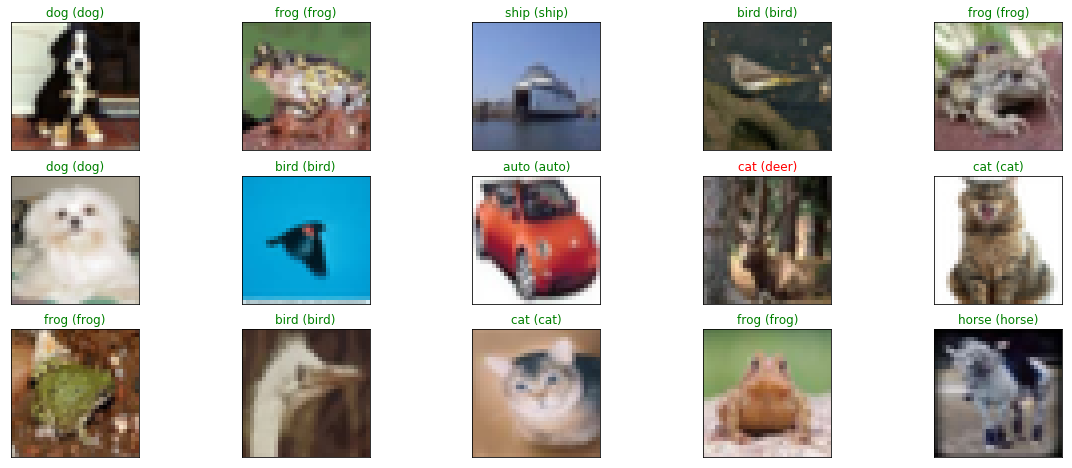

In [56]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(cifar10_labels[predict_index], 
                                  cifar10_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))